In [1]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [2]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [3]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

ridge = make_pipeline(
    StandardScaler(),
    Ridge(alpha=0),
)

cv_results = cross_validate(
    ridge,
    data_numerical,
    target,
    cv=10,
    return_train_score=True,
    return_estimator=True,
)

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.14082e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.48388e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.80818e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.08256e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarnin

In [4]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge_scaled_data = pd.DataFrame(coefs, columns=numerical_features)

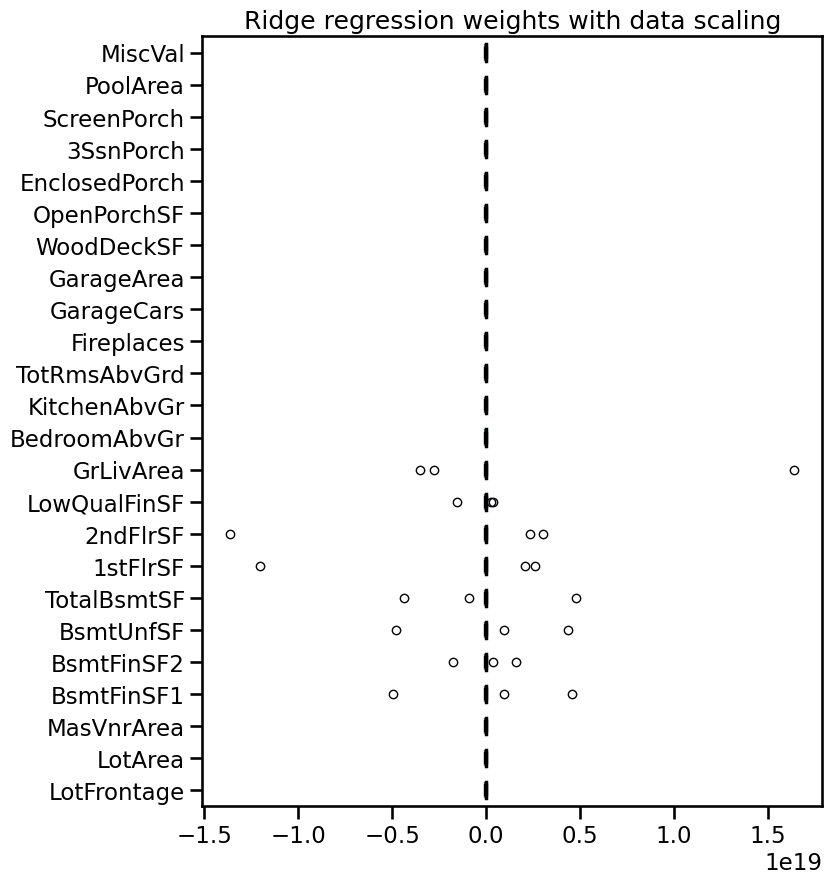

In [5]:
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}

fig, ax = plt.subplots(figsize=(8, 10))
weights_ridge_scaled_data.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Ridge regression weights with data scaling")

In [6]:
ridge = make_pipeline(
    StandardScaler(),
    Ridge(alpha=1.0),
)

cv_results = cross_validate(
    ridge,
    data_numerical,
    target,
    cv=10,
    return_train_score=True,
    return_estimator=True,
)

In [7]:
test_score_lr = cv_results["test_score"]
test_score_lr

array([0.76141451, 0.80641846, 0.81189462, 0.66604739, 0.79954829,
       0.76884041, 0.75638555, 0.71820366, 0.3150606 , 0.78640382])

In [8]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge_scaled_data = pd.DataFrame(coefs, columns=numerical_features)

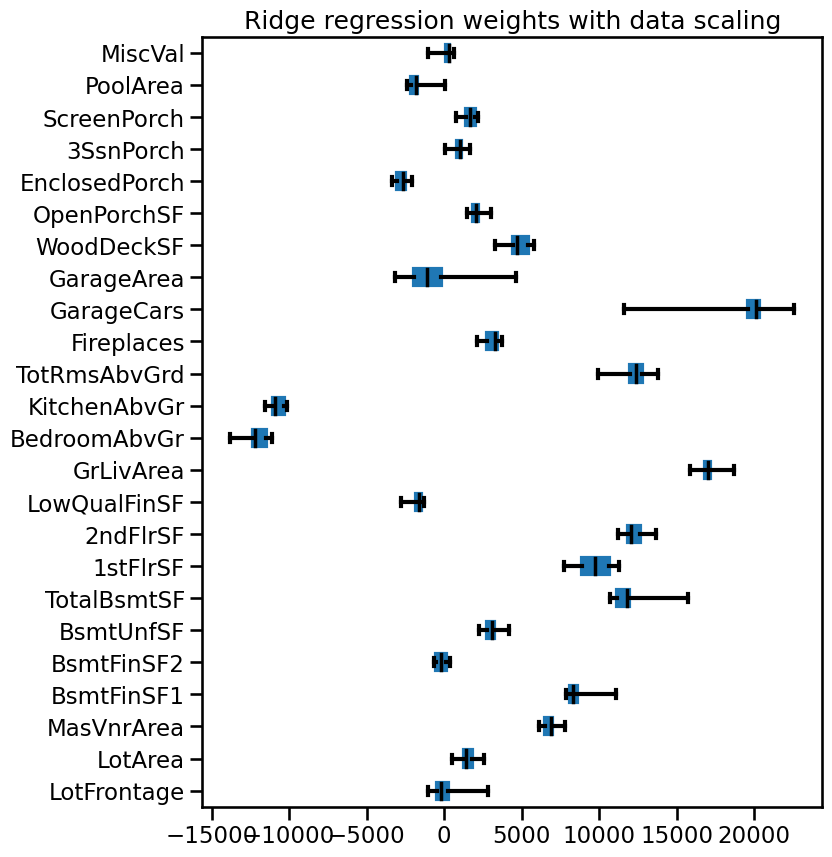

In [9]:
fig, ax = plt.subplots(figsize=(8, 10))
weights_ridge_scaled_data.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Ridge regression weights with data scaling")

In [10]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [11]:
ridge = make_pipeline(
    StandardScaler(),
    Ridge(alpha=1.0),
)

cv_results = cross_validate(
    ridge,
    data_numerical,
    target,
    cv=10,
    return_train_score=True,
    return_estimator=True,
)

In [12]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge_scaled_data = pd.DataFrame(coefs, columns=numerical_features)

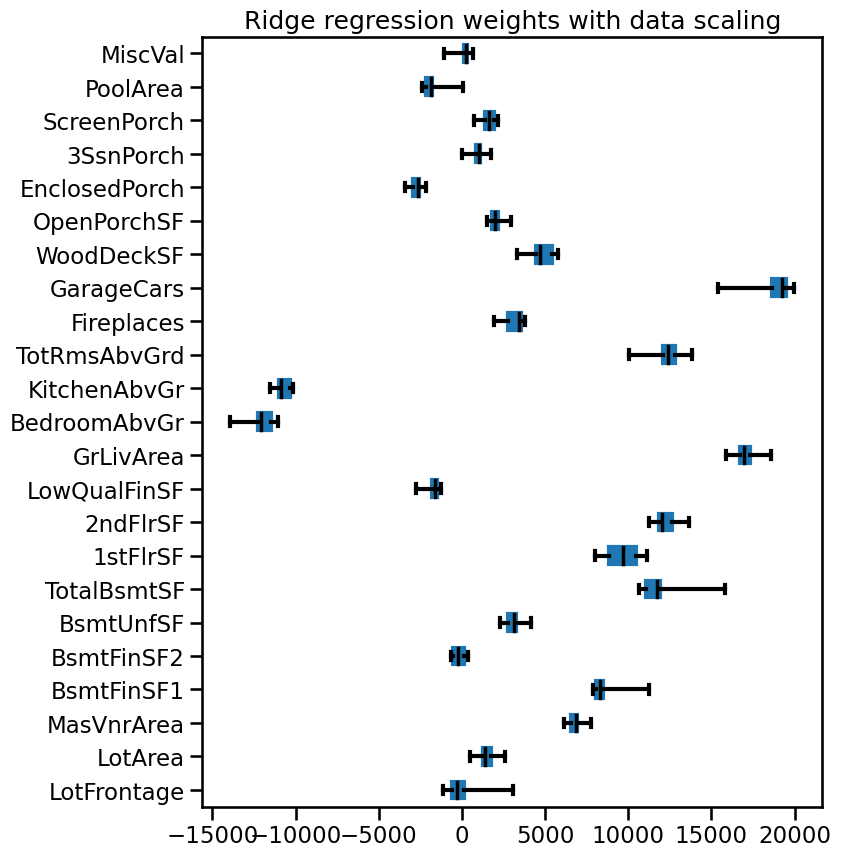

In [13]:
fig, ax = plt.subplots(figsize=(8, 10))
weights_ridge_scaled_data.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Ridge regression weights with data scaling")

In [14]:
import numpy as np
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-3, 3, num=101)
ridge = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=alphas, store_cv_values=True),
)

In [15]:
cv_results = cross_validate(
    ridge,
    data_numerical,
    target,
    cv=10,
    return_train_score=True,
    return_estimator=True,
)

In [16]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge_scaled_data = pd.DataFrame(coefs, columns=numerical_features)

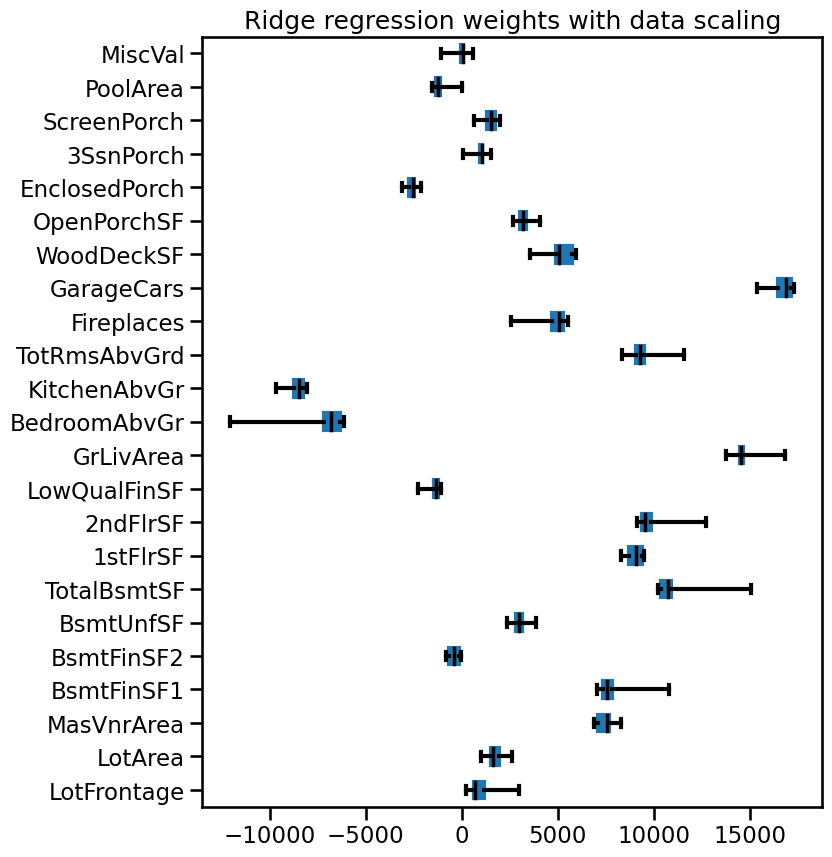

In [17]:
fig, ax = plt.subplots(figsize=(8, 10))
weights_ridge_scaled_data.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Ridge regression weights with data scaling")

In [18]:
mse_alphas = [
    est[-1].cv_values_.mean(axis=0) for est in cv_results["estimator"]
]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas = cv_alphas.aggregate(["mean", "std"]).T
cv_alphas

,mean,std
0.001000,1.959554e+09,2.101145e+08
0.001148,1.959554e+09,2.101145e+08
0.001318,1.959554e+09,2.101144e+08
0.001514,1.959553e+09,2.101144e+08
0.001738,1.959553e+09,2.101144e+08
...,...,...
575.439937,1.924717e+09,1.711668e+08
660.693448,1.936088e+09,1.682903e+08
758.577575,1.951058e+09,1.653861e+08
870.963590,1.970221e+09,1.624685e+08


In [19]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
best_alphas

[331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 63.0957344480193,
 331.13112148259074]

In [20]:
print(
    f"Min optimal alpha: {np.min(best_alphas):.2f} and "
    f"Max optimal alpha: {np.max(best_alphas):.2f}"
)

Min optimal alpha: 63.10 and Max optimal alpha: 331.13


In [21]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown="ignore"), categorical_columns)
    ]
)

In [24]:
alphas = np.logspace(-3, 3, num=101)
ridge = make_pipeline(
    preprocessor,
    RidgeCV(alphas=alphas, store_cv_values=True),
)

In [25]:
cv_results = cross_validate(
    ridge,
    data,
    target,
    cv=10,
    return_train_score=True,
    return_estimator=True,
)


In [26]:
test_score_complex_lr = cv_results["test_score"]
test_score_complex_lr

array([0.90338452, 0.88492929, 0.87957634, 0.76447422, 0.88298673,
       0.88485529, 0.87342098, 0.86918407, 0.5670037 , 0.88480608])

A model using both all features is better than a model using only numerical features for 10 CV iterations out of 10.


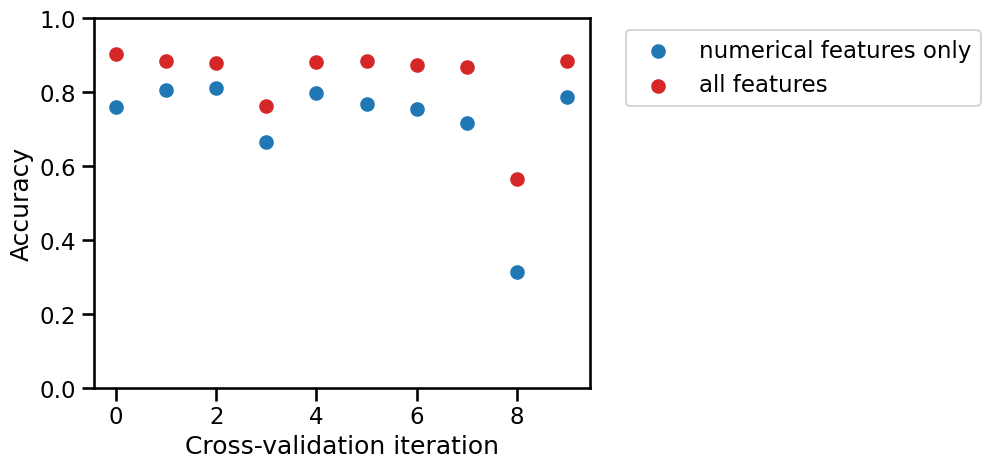

In [27]:
import matplotlib.pyplot as plt

indices = np.arange(len(test_score_lr))
plt.scatter(
    indices, test_score_lr, color="tab:blue", label="numerical features only"
)
plt.scatter(
    indices,
    test_score_complex_lr,
    color="tab:red",
    label="all features",
)
plt.ylim((0, 1))
plt.xlabel("Cross-validation iteration")
plt.ylabel("Accuracy")
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

print(
    "A model using both all features is better than a"
    " model using only numerical features for"
    f" {sum(test_score_complex_lr > test_score_lr)} CV iterations out of 10."
)

A model using both numerical and categorical features is better than a model using only numerical features for 10 CV iterations out of 10.


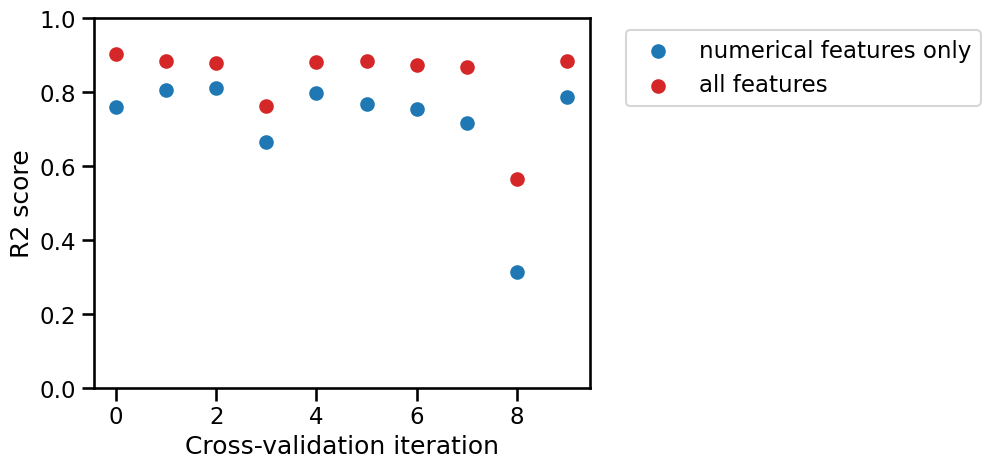

In [28]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = selector(dtype_include=object)(data)


preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
    (StandardScaler(), numerical_features),
)
model = make_pipeline(preprocessor, RidgeCV(alphas=alphas))
cv_results_num_and_cat = cross_validate(
    model, data, target, cv=10, n_jobs=2
)
test_score_num_and_cat = cv_results_num_and_cat["test_score"]

indices = np.arange(len(test_score_lr))
plt.scatter(
    indices,
    test_score_lr,
    color="tab:blue",
    label="numerical features only"
)
plt.scatter(
    indices,
    test_score_num_and_cat,
    color="tab:red",
    label="all features",
)
plt.ylim((0, 1))
plt.xlabel("Cross-validation iteration")
plt.ylabel("R2 score")
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

print(
    "A model using both numerical and categorical features is better than a"
    " model using only numerical features for"
    f" {sum(test_score_num_and_cat > test_score_lr)} CV iterations out of 10."
)